Observations and Insights:
1.) The first observation that I noticed within the data, is that there appears to be a linear relationship between weight and tumor volume of mice that were placed on Capomulin, as can be seen with the linear regression model at the bottom of the code.
2.) The second insight I took from this data, was there was a relatively even number of mice on each drug regimen as I observed from the box plots, as each mouse was unique, the mice were divided nearly equally amongst the various regimens to ensure a stable sample size.
3.) The final observation that I noted from this data, was the relative stability in results amongst the various methods at final timepoints. With the exception of Infubinol, none of the four observed treatments had outliers plotted on their respective boxplots in observing final tumor volume. Though it should be noted that there were additional treatments that were not observed against this criteria. 

In [3]:
#dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import regression line for last section
from scipy.stats import linregress

#path to data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#read the data in csv reader
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata
#study_results
#combine/merge into a single dataset 
# put study_results first so mouse Id and timepoint are next to one another
mouse_data = pd.merge(study_results, mouse_metadata)

# display the table for preview
mouse_data.head(10) 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [4]:
# checking the number of mice
merged_mice_count = mouse_data['Mouse ID'].nunique()
merged_mice_count

249

In [5]:
# getting the duplicate mice by ID number for Mouse ID
# and timepoint need to do a .loc function
# how to find duplicates in pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
#subset is ID and timepoints 
duplicate_df = mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()  
duplicate_df


array(['g989'], dtype=object)

In [6]:
# create a clean df by dropping the duplicate mouse by its Mouse ID
# use .isin to take away the duplicated values in the main data frame that were identified in the duplicated_df
#.isin makes sure the values must match thus if you make it == False,it will remove the duplicates
# documentation: https://stackoverflow.com/questions/14057007/remove-rows-not-isinx/33642919
cleaned_mouse_data = mouse_data[mouse_data['Mouse ID'].isin(duplicate_df) == False]
cleaned_mouse_data.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [7]:
#check number of mice in new dataframe

cleaned_count = len(cleaned_mouse_data['Mouse ID'].unique()) 
cleaned_count

248

Summary Statistics

In [8]:
#list of all regimens
drug_regimens = cleaned_mouse_data['Drug Regimen'].unique()  
drug_regimens

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [9]:
#generate summary statistics of mean, median, variance, st. dev, and SEM for each regimen (medication)
# create multiple series and put all together at end

# statistics for Capomulin
capo_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']   
capo_mean = capo_stats.mean()['Tumor Volume (mm3)']
capo_med = capo_stats.median()['Tumor Volume (mm3)']
capo_var = capo_stats.var()['Tumor Volume (mm3)']
capo_st_d = capo_stats.std()['Tumor Volume (mm3)']
capo_sem = capo_stats.sem()['Tumor Volume (mm3)']

capo_analysis = pd.DataFrame({"Tumor Mean": capo_mean, "Tumor Median": capo_med, "Tumor Variance":
                             capo_var, "Tumor Standard Deviation": capo_st_d, "SEM": capo_sem}, index=[0])  
capo_analysis


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,40.675741,41.557809,24.947764,4.994774,0.329346


In [10]:
#Ketapril analysis

# statistics for Ketapril
keta_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Ketapril']   
keta_mean = keta_stats.mean()['Tumor Volume (mm3)']
keta_med = keta_stats.median()['Tumor Volume (mm3)']
keta_var = keta_stats.var()['Tumor Volume (mm3)']
keta_st_d = keta_stats.std()['Tumor Volume (mm3)']
keta_sem = keta_stats.sem()['Tumor Volume (mm3)']

keta_analysis = pd.DataFrame({"Tumor Mean": keta_mean, "Tumor Median": keta_med, "Tumor Variance":
                             keta_var, "Tumor Standard Deviation": keta_st_d, "SEM": keta_sem}, index=[0])  
keta_analysis


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,55.235638,53.698743,68.553577,8.279709,0.60386


In [11]:
#Naftisol analysis 
# statistics for Naftisol
naft_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Naftisol']   
naft_mean = naft_stats.mean()['Tumor Volume (mm3)']
naft_med = naft_stats.median()['Tumor Volume (mm3)']
naft_var = naft_stats.var()['Tumor Volume (mm3)']
naft_st_d = naft_stats.std()['Tumor Volume (mm3)']
naft_sem = naft_stats.sem()['Tumor Volume (mm3)']

naft_analysis = pd.DataFrame({"Tumor Mean": naft_mean, "Tumor Median": naft_med, "Tumor Variance":
                             naft_var, "Tumor Standard Deviation": naft_st_d, "SEM": naft_sem}, index=[0])  
naft_analysis

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,54.331565,52.509285,66.173479,8.134708,0.596466


In [12]:
#Infubinol analysis

# statistics for Infubinol
inf_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Infubinol']   
inf_mean = inf_stats.mean()['Tumor Volume (mm3)']
inf_med = inf_stats.median()['Tumor Volume (mm3)']
inf_var = inf_stats.var()['Tumor Volume (mm3)']
inf_st_d = inf_stats.std()['Tumor Volume (mm3)']
inf_sem = inf_stats.sem()['Tumor Volume (mm3)']

inf_analysis = pd.DataFrame({"Tumor Mean": inf_mean, "Tumor Median": inf_med, "Tumor Variance":
                             inf_var, "Tumor Standard Deviation": inf_st_d, "SEM": inf_sem}, index=[0])  
inf_analysis


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,52.884795,51.820584,43.128684,6.567243,0.492236


In [13]:
#Stelasyn analysis
# statistics for Stelasyn
stel_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Stelasyn']   
stel_mean = stel_stats.mean()['Tumor Volume (mm3)']
stel_med = stel_stats.median()['Tumor Volume (mm3)']
stel_var = stel_stats.var()['Tumor Volume (mm3)']
stel_st_d = stel_stats.std()['Tumor Volume (mm3)']
stel_sem = stel_stats.sem()['Tumor Volume (mm3)']

stel_analysis = pd.DataFrame({"Tumor Mean": stel_mean, "Tumor Median": stel_med, "Tumor Variance":
                             stel_var, "Tumor Standard Deviation": stel_st_d, "SEM": stel_sem}, index=[0])  
stel_analysis


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
#Ramicane

# statistics for Ramicane
ram_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Ramicane']   
ram_mean = ram_stats.mean()['Tumor Volume (mm3)']
ram_med = ram_stats.median()['Tumor Volume (mm3)']
ram_var = ram_stats.var()['Tumor Volume (mm3)']
ram_st_d = ram_stats.std()['Tumor Volume (mm3)']
ram_sem = ram_stats.sem()['Tumor Volume (mm3)']

ram_analysis = pd.DataFrame({"Tumor Mean": ram_mean, "Tumor Median": ram_med, "Tumor Variance":
                             ram_var, "Tumor Standard Deviation": ram_st_d, "SEM": ram_sem}, index=[0])  
ram_analysis


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,40.216745,40.673236,23.486704,4.846308,0.320955


In [15]:
#Zoniferol

# statistics for Zoniferol
zoni_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']   
zoni_mean = zoni_stats.mean()['Tumor Volume (mm3)']
zoni_med = zoni_stats.median()['Tumor Volume (mm3)']
zoni_var = zoni_stats.var()['Tumor Volume (mm3)']
zoni_st_d = zoni_stats.std()['Tumor Volume (mm3)']
zoni_sem = zoni_stats.sem()['Tumor Volume (mm3)']

zoni_analysis = pd.DataFrame({"Tumor Mean": zoni_mean, "Tumor Median": zoni_med, "Tumor Variance":
                             zoni_var, "Tumor Standard Deviation": zoni_st_d, "SEM": zoni_sem}, index=[0])  
zoni_analysis


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,40.675741,41.557809,24.947764,4.994774,0.329346


In [16]:
#Propriva

# statistics for Propriva
prop_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Propriva']   
prop_mean = prop_stats.mean()['Tumor Volume (mm3)']
prop_med = prop_stats.median()['Tumor Volume (mm3)']
prop_var = prop_stats.var()['Tumor Volume (mm3)']
prop_st_d = prop_stats.std()['Tumor Volume (mm3)']
prop_sem = prop_stats.sem()['Tumor Volume (mm3)']

prop_analysis = pd.DataFrame({"Tumor Mean": prop_mean, "Tumor Median": prop_med, "Tumor Variance":
                             prop_var, "Tumor Standard Deviation": prop_st_d, "SEM": prop_sem}, index=[0])  
prop_analysis


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,52.32093,50.446266,43.852013,6.622085,0.544332


In [17]:
#Placebo

# statistics for placebo
placebo_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Placebo']   
placebo_mean = placebo_stats.mean()['Tumor Volume (mm3)']
placebo_med = placebo_stats.median()['Tumor Volume (mm3)']
placebo_var = placebo_stats.var()['Tumor Volume (mm3)']
placebo_st_d = placebo_stats.std()['Tumor Volume (mm3)']
placebo_sem = placebo_stats.sem()['Tumor Volume (mm3)']

placebo_analysis = pd.DataFrame({"Tumor Mean": placebo_mean, "Tumor Median": placebo_med, "Tumor Variance":
                             placebo_var, "Tumor Standard Deviation": placebo_st_d, "SEM": placebo_sem}, index=[0])  
placebo_analysis


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,54.033581,52.288934,61.168083,7.821003,0.581331


In [18]:
#Ceftamin

# statistics for Ceftamin
ceft_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Ceftamin']   
ceft_mean = ceft_stats.mean()['Tumor Volume (mm3)']
ceft_med = ceft_stats.median()['Tumor Volume (mm3)']
ceft_var = ceft_stats.var()['Tumor Volume (mm3)']
ceft_st_d = ceft_stats.std()['Tumor Volume (mm3)']
ceft_sem = ceft_stats.sem()['Tumor Volume (mm3)']

ceft_analysis = pd.DataFrame({"Tumor Mean": ceft_mean, "Tumor Median": ceft_med, "Tumor Variance":
                             ceft_var, "Tumor Standard Deviation": ceft_st_d, "SEM": ceft_sem}, index=[0])  
ceft_analysis


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
0,52.591172,51.776157,39.290177,6.268188,0.469821


In [19]:
#create a summary statistics table of all regimens in a groupby function using Regimen
#will only need the mouse ID regimen and tumor volume
regimen_stat_df = cleaned_mouse_data.loc[:,['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']] 
regimen_stat_df

#DON'T FORGET TO PUT THE SPACE BETWEEN VOLUMEN AND (MM3)!!
regimen_mean = regimen_stat_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'] 
regimen_med = regimen_stat_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'] 
regimen_var = regimen_stat_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
regimen_st_d = regimen_stat_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
regimen_sem = regimen_stat_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

#regimen_med
# #put all the info into new data frame

#no need to add index=[0] at the end of the dictionary list because it is already being grouped by Drug Regimen
group_regimen_df = pd.DataFrame({"Tumor Mean": regimen_mean, "Tumor Median": regimen_med, "Tumor Variance":
                                regimen_var, "Tumor Standard Deviation": regimen_st_d, "SEM": regimen_sem})   
group_regimen_df


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

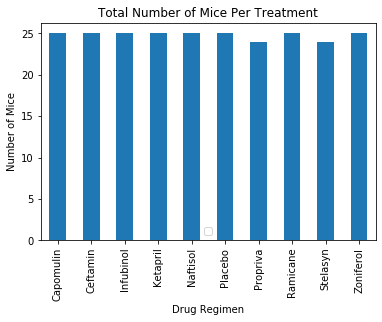

In [20]:
# Generate a bar plot showing the total number OF MICE for each treatment throughout 
# the course of the study using pandas. 
#do NOT make a bar chart for each regimen 

#x-axis
# bar_x_axis = np.arange(len(cleaned_mouse_data['Drug Regimen'].unique())) doesn't work need the values names
bar_locate = cleaned_mouse_data.loc[:, ['Mouse ID', 'Drug Regimen']] 
bar_locate

#use .nunique in the same way you found the summary table values above each mouse is unique so put ['Mouse ID'] at the end
bar_count = bar_locate.groupby(['Drug Regimen']).nunique()['Mouse ID'] 

# bar_x_values = bar_count.index
# bar_y_values = bar_count.values

#put into a new data frame
bar_pd_df = pd.DataFrame(bar_count) 

bar_pd_chart = bar_pd_df.plot.bar(rot=90, title='Total Number of Mice Per Treatment') 
bar_pd_chart.set_xlabel("Drug Regimen")
bar_pd_chart.set_ylabel("Number of Mice")
bar_pd_chart.legend([])   





Text(0.5, 0, 'Drug Regimen')

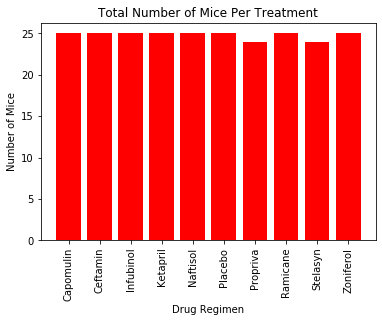

In [21]:
#make a bar chart of number of mice in each treatment using matplotlib

bar_plt_count = bar_count 

# took the x and y axis from above that were not used
bar_x_axis = bar_plt_count.index 
bar_y_axis = bar_plt_count.values
bar_x_ticks = [value for value in bar_x_axis] 
# plt.xticks(bar_x_ticks, bar_plt_count)  
#plot the bar graph
plt.bar(bar_x_axis, bar_y_axis, color='r')
plt.xticks(bar_x_ticks, list(bar_x_axis), rotation=90)

#labels
plt.title("Total Number of Mice Per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen") 


Pie Charts

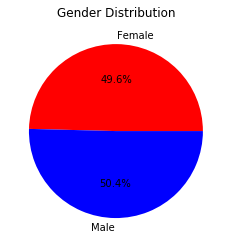

In [22]:
#generate pie plot showing distribution of male vs female mice in pandas
# gender_loc = cleaned_mouse_data.loc[:,['Mouse ID', 'Sex']]
gender_group = cleaned_mouse_data.groupby(['Sex']).nunique()  
gender_df = pd.DataFrame(gender_group)
gender_count = gender_df["Mouse ID"]

pie_sex = gender_count.index
pie_sex_number = gender_count.values

colors = ["red", "blue"]

gender_count.plot(kind='pie', colors=colors, autopct='%1.1f%%')       
plt.title("Gender Distribution")
plt.ylabel("")
plt.show() 

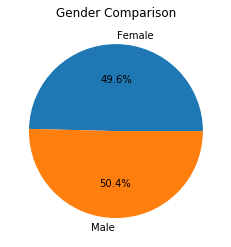

In [23]:
#pie plot using matplotlib

plt_count = cleaned_mouse_data.loc[:,['Mouse ID', 'Sex']]
plt_group = plt_count.groupby(['Sex']).nunique()['Mouse ID'] 

labels = plt_group.index
sizes = plt_group.values

# documentation: http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php
plt.pie(sizes, labels=labels, autopct='%1.1f%%')  

plt.title("Gender Comparison") 
plt.show() 


Quartiles, Outliers, and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = cleaned_mouse_data.groupby('Mouse ID').max()['Timepoint'] 
mouse_max_df = pd.DataFrame(mouse_group) 
mouse_max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_mouse_data = mouse_max_df.merge(cleaned_mouse_data, on=["Mouse ID", "Timepoint"]) 
merge_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# the for loop was too difficult do them each indiviually in a variable
# follow the same format you used for creating summary statistics BUT attach tumor volume to the variable
capomulin = merge_mouse_data.loc[merge_mouse_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'] 



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#find quartiles 
#QUANTILE NOT QUANTILES
quartile_capo = capomulin.quantile([.25,.5,.75])
capo_lower = quartile_capo[0.25] 
capo_upper = quartile_capo[0.75] 
iqr_capo = capo_upper - capo_lower
capo_low_out = capo_lower-(1.5*iqr_capo)
capo_up_out = capo_upper+(1.5*iqr_capo) 

    
    
    # Determine outliers using upper and lower bounds
print(f"Any tumor volume below {round(capo_low_out,2)} is deemed an outlier.")
print(f"Any tumor volume above {round(capo_up_out,2)} is deemed an outlier.") 

Any tumor volume below 20.7 is deemed an outlier.
Any tumor volume above 51.83 is deemed an outlier.


In [26]:
#Ramicane

ramicane = merge_mouse_data.loc[merge_mouse_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'] 



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#find quartiles 
#QUANTILE NOT QUANTILES
quartile_rami = ramicane.quantile([.25,.5,.75])
rami_lower = quartile_rami[0.25] 
rami_upper = quartile_rami[0.75] 
iqr_rami = rami_upper - rami_lower
rami_low_out = rami_lower-(1.5*iqr_rami)
rami_up_out = rami_upper+(1.5*iqr_rami)

print(f"Any tumor volume below {round(rami_low_out,2)} is deemed an outlier.")
print(f"Any tumor volume above {round(rami_up_out,2)} is deemed an outlier.") 

Any tumor volume below 17.91 is deemed an outlier.
Any tumor volume above 54.31 is deemed an outlier.


In [27]:
# Infubinol

infubinol = merge_mouse_data.loc[merge_mouse_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'] 



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#find quartiles 
#QUANTILE NOT QUANTILES
quartile_inf = infubinol.quantile([.25,.5,.75])
inf_lower = quartile_inf[0.25] 
inf_upper = quartile_inf[0.75] 
iqr_inf = inf_upper - inf_lower
inf_low_out = inf_lower-(1.5*iqr_inf)
inf_up_out = inf_upper+(1.5*iqr_inf)

print(f"Any tumor volume below {round(inf_low_out,2)} is deemed an outlier.")
print(f"Any tumor volume above {round(inf_up_out,2)} is deemed an outlier.") 

Any tumor volume below 36.83 is deemed an outlier.
Any tumor volume above 82.74 is deemed an outlier.


In [28]:
# Ceftamin

ceftamin = merge_mouse_data.loc[merge_mouse_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'] 



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#find quartiles 
#QUANTILE NOT QUANTILES
quartile_ceft = ceftamin.quantile([.25,.5,.75])
ceft_lower = quartile_ceft[0.25] 
ceft_upper = quartile_ceft[0.75] 
iqr_ceft = ceft_upper - ceft_lower
ceft_low_out = ceft_lower-(1.5*iqr_ceft)
ceft_up_out = ceft_upper+(1.5*iqr_ceft) 

print(f"Any tumor volume below {round(ceft_low_out,2)} is deemed an outlier.")
print(f"Any tumor volume above {round(ceft_up_out,2)} is deemed an outlier.") 

Any tumor volume below 25.36 is deemed an outlier.
Any tumor volume above 87.67 is deemed an outlier.


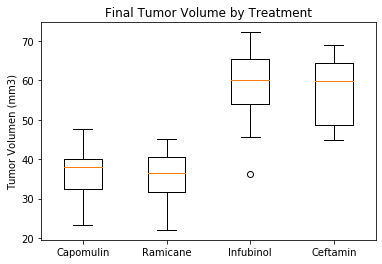

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#take the variables you have created as the array, put labels in from the list you created earlier
# rubric calls for coloring in the outliers
plt.boxplot([capomulin,ramicane,infubinol,ceftamin], labels=treatment_list) 
plt.title("Final Tumor Volume by Treatment")
plt.ylabel("Tumor Volumen (mm3)") 
plt.show() 

Line and Scatter Plots

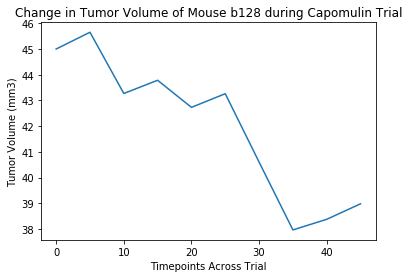

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# DON'T USE MERGR_MOUSE_DATA it only shows the final volume
#locate a mouse 
capo_mouse = cleaned_mouse_data.loc[cleaned_mouse_data['Mouse ID'] == 'b128'] 
mouse_timepoint = capo_mouse['Timepoint']
mouse_tumor = capo_mouse['Tumor Volume (mm3)'] 

plt.plot(mouse_timepoint, mouse_tumor)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoints Across Trial')
plt.title('Change in Tumor Volume of Mouse b128 during Capomulin Trial')
plt.show()



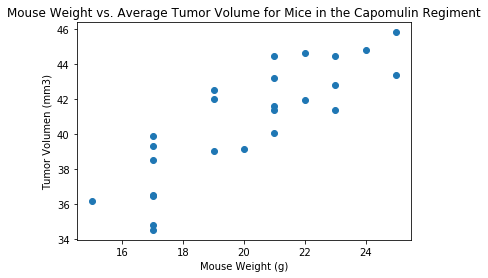

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# find mice on regimen
capo_reg = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']
# group all mice by their individual id and take average
capo_reg_group = capo_reg.groupby(['Mouse ID']).mean() 

capo_weight = capo_reg_group['Weight (g)'] 
# capo_weight

capo_tumor_vol = capo_reg_group['Tumor Volume (mm3)'] 
# capo_tumor_vol

plt.scatter(capo_weight, capo_tumor_vol)
plt.title("Mouse Weight vs. Average Tumor Volume for Mice in the Capomulin Regiment")
plt.xlabel("Mouse Weight (g)") 
plt.ylabel("Tumor Volumen (mm3)") 
plt.show() 




Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capo_reg_group.head() 

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


In [41]:
#correlation
weight = capo_reg_group.iloc[:,4]  
tum_vol = capo_reg_group.iloc[:,1] 
correlation = st.pearsonr(weight, tum_vol) 
print(f'The correlation between mouse weight and tumor volume is {round(correlation[0],2)}.') 

The correlation between mouse weight and tumor volume is 0.84.


In [42]:
# regression
linregress(weight, tum_vol) 

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [43]:
# final scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tum_vol) 

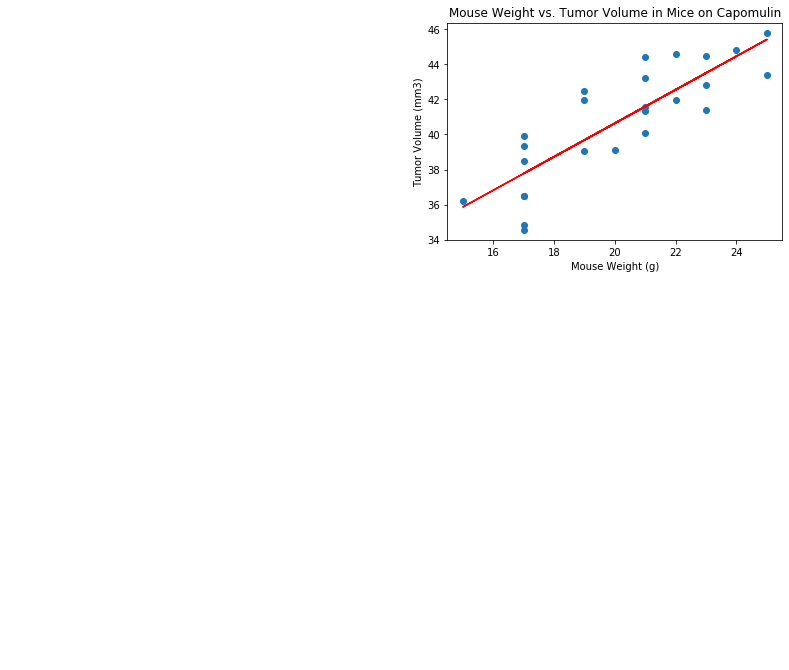

In [47]:
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tum_vol)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=10,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Tumor Volume in Mice on Capomulin') 
plt.show() 